### 1. Import Libraries and Dataset

In [68]:
# Import visualization libraries

import plotly.express as px # simple and interactive plots
import plotly.graph_objects as go # customizable and advanced visualizations
import plotly.figure_factory as ff # complex and specialized visualizations
import plotly.subplots as make_subplots # function to make subplots in Plotly, make arranging multiple plots together available

import matplotlib.pyplot as plt # traditional 2D plotting
%matplotlib inline
# display plots directly in Jupyter notebook
import seaborn as sns # attractive statistical graphics (built on top of Matplotlib)

In [69]:
# Import data processing libraries

import numpy as np
import pandas as pd

In [70]:
# Import EDA supporting library

!pip install ydata-profiling
from ydata_profiling import ProfileReport

In [71]:
# Import dataset

df = pd.read_csv('/Users/ellia.hsieh/Documents/GitHub/strategic-partner-identification/data/02-processed/processed-sleep-apnea.csv')

### 2. Data Preprocessing

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   NCT Number                  1717 non-null   object
 1   Study Title                 1717 non-null   object
 2   Study URL                   1717 non-null   object
 3   Study Status                1717 non-null   object
 4   Brief Summary               1717 non-null   object
 5   Study Results               1717 non-null   bool  
 6   Conditions                  1717 non-null   object
 7   Interventions               1717 non-null   object
 8   Intervention Types          1717 non-null   object
 9   Primary Outcome Measures    1717 non-null   object
 10  Secondary Outcome Measures  1337 non-null   object
 11  Other Outcome Measures      156 non-null    object
 12  Combined Outcome Measures   1717 non-null   object
 13  Sponsor                     1717 non-null   obje

In [73]:
# Readjust data type

df['Study Status'] = df['Study Status'].astype('category')
df['Enrollment'] = df['Enrollment'].fillna(0).astype(int)
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Completion Date'] = pd.to_datetime(df['Completion Date'], errors='coerce')
df['Last Update Posted'] = pd.to_datetime(df['Last Update Posted'], errors='coerce')
df['Sex'] = df['Sex'].astype('category')
df['Phases'] = df['Phases'].astype('category')
df['Study Type'] = df['Study Type'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   NCT Number                  1717 non-null   object        
 1   Study Title                 1717 non-null   object        
 2   Study URL                   1717 non-null   object        
 3   Study Status                1717 non-null   category      
 4   Brief Summary               1717 non-null   object        
 5   Study Results               1717 non-null   bool          
 6   Conditions                  1717 non-null   object        
 7   Interventions               1717 non-null   object        
 8   Intervention Types          1717 non-null   object        
 9   Primary Outcome Measures    1717 non-null   object        
 10  Secondary Outcome Measures  1337 non-null   object        
 11  Other Outcome Measures      156 non-null    object      

### 3. Univariate Analysis

#### 3-1. 'Study Status'

In [74]:
# Get the value counts

study_status_counts = df['Study Status'].value_counts()

# Manually sort order

custom_order = ['NOT_YET_RECRUITING', 'ENROLLING_BY_INVITATION', 'RECRUITING', 'ACTIVE_NOT_RECRUITING', 'COMPLETED', 'TERMINATED', 'WITHDRAWN', 'SUSPENDED', 'UNKNOWN']

study_status_counts = study_status_counts.reindex(custom_order)
study_status_counts

Study Status
NOT_YET_RECRUITING          63
ENROLLING_BY_INVITATION     10
RECRUITING                 210
ACTIVE_NOT_RECRUITING       41
COMPLETED                  988
TERMINATED                 124
WITHDRAWN                   68
SUSPENDED                    8
UNKNOWN                    205
Name: count, dtype: int64

/var/folders/jl/01tzrgks3dx461xnmrxt87180000gn/T/ipykernel_45325/3161243292.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=study_status_counts.index, y=study_status_counts.values, palette='crest', order=study_status_counts.index)


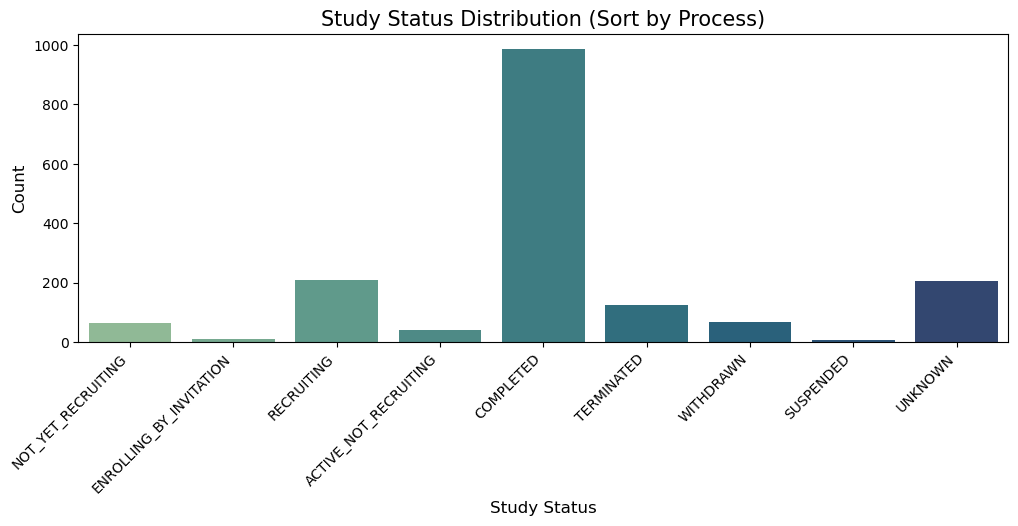

In [75]:
# Create a bar plot using seaborn

plt.figure(figsize=(12,4))
sns.barplot(x=study_status_counts.index, y=study_status_counts.values, palette='crest', order=study_status_counts.index)

# Add labels and title

plt.xlabel('Study Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Study Status Distribution (Sort by Process)', fontsize=15)

# Adjust x labels

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()

#### 3-2. 'Brief Summary'

#### 3-3. 'Study Results'

In [76]:
df['Study Results'].value_counts()

Study Results
False    1399
True      318
Name: count, dtype: int64

#### 3-4. 'Intervention Types'

#### 3-5. 'Combined Outcome Measures'

#### 3-6. Sponsor and Collaborators

#### 3-7. Sex and Age

#### 3-8. Phases and Enrollment

In [9]:
df['Intervention Types'].unique()

array(['OTHER', 'DIETARY_SUPPLEMENT', 'DEVICE', 'DRUG',
       'OTHER, DIETARY_SUPPLEMENT', 'DRUG, DEVICE', 'OTHER, PROCEDURE',
       'OTHER, DEVICE', 'PROCEDURE', 'DIAGNOSTIC_TEST', 'BEHAVIORAL',
       'BEHAVIORAL, OTHER', 'DRUG, OTHER, DEVICE',
       'DIETARY_SUPPLEMENT, DEVICE', 'DRUG, OTHER',
       'PROCEDURE, DIETARY_SUPPLEMENT', 'BEHAVIORAL, DRUG, DEVICE',
       'BEHAVIORAL, PROCEDURE', 'BEHAVIORAL, DRUG, PROCEDURE',
       'BEHAVIORAL, DEVICE', 'DIAGNOSTIC_TEST, DEVICE', 'DRUG, PROCEDURE',
       'COMBINATION_PRODUCT',
       'BEHAVIORAL, PROCEDURE, DEVICE, COMBINATION_PRODUCT',
       'DIAGNOSTIC_TEST, OTHER', 'COMBINATION_PRODUCT, DRUG, DEVICE',
       'COMBINATION_PRODUCT, OTHER', 'DRUG, DIAGNOSTIC_TEST',
       'BEHAVIORAL, PROCEDURE, COMBINATION_PRODUCT',
       'DRUG, OTHER, DIETARY_SUPPLEMENT, DEVICE', 'PROCEDURE, DEVICE',
       'DIAGNOSTIC_TEST, OTHER, DEVICE',
       'DIAGNOSTIC_TEST, PROCEDURE, DEVICE', 'BEHAVIORAL, OTHER, DEVICE',
       'BIOLOGICAL', 'OTHER, PR

In [10]:
df['Intervention ']

array(['OTHER: Mouth closure',
       'DIETARY_SUPPLEMENT: Dietary nitrate|DIETARY_SUPPLEMENT: Placebo',
       'DEVICE: ICD|DEVICE: CRT-D', ...,
       'DRUG: Lemborexant 5 MG Oral Tablet [Dayvigo] Day 1|DRUG: Lemborexant 5 MG Oral Tablet [Dayvigo] Day 2|DRUG: Placebo Day 1|DRUG: Placebo Day 2',
       'BEHAVIORAL: Driving Decision Aid|BEHAVIORAL: Older Drivers Website',
       'OTHER: health information prescription'], dtype=object)